#Multi pivot Quick sort 
-*By Aditi Juneja*

#Recap : Vanilla quick sort 



Quick sort : 
1. [Quick explanation](https://youtu.be/Hoixgm4-P4M) 
2. [Notes](https://github.com/Schefflera-Arboricola/Stuff/blob/main/Assignments/Notes/kth_quick_lowerbound.pdf)

<br>

---

Imagine a wooden stick. Now, let's pick a random spot on it and break it from there. We will get a longer piece and a shorter piece. Now, what do you think will be the expected length(or average length, if i break a million sticks like this) of the longer piece?  
<br>
*you might think it's 1/2 the length of the original stick if you get too caught up in seeing the stick as a numberline, but it's actually 3/4 th... think about it* [see [notes](https://github.com/Schefflera-Arboricola/Stuff/blob/main/Assignments/Notes/kth_quick_lowerbound.pdf) for proof].

<br>

Now, think of an array as a wooden stick, and let's choose a random element of this array and break this array at that point, except we break it such that all the elements greater than the breaking point element are shifted to one side and less than elements are on the other side. These "sides" are the two pieces of the array. 

<br>

Now, if we see our array, it is kind of sorted <sup>[1]</sup> ; the breaking point element is in the correct position, and all the other elements have also been put into two groups and are closer(on average) to their position in the sorted array. So, we can develop a sorting algorithm here. We can treat the two pieces of array that we obtained as two new arrays and then break them and get 4 pieces, then 8 and so on... Observe that in each breaking iteration (or level of recursion tree shown below), we are doing *n* amount of work(or comparisons), if we ignore the constants. [*n is the length of the array, and we will be assuming that it's very large throughout*]
<br>
**Pause..** : How many levels on average do you think the below given tree will have?


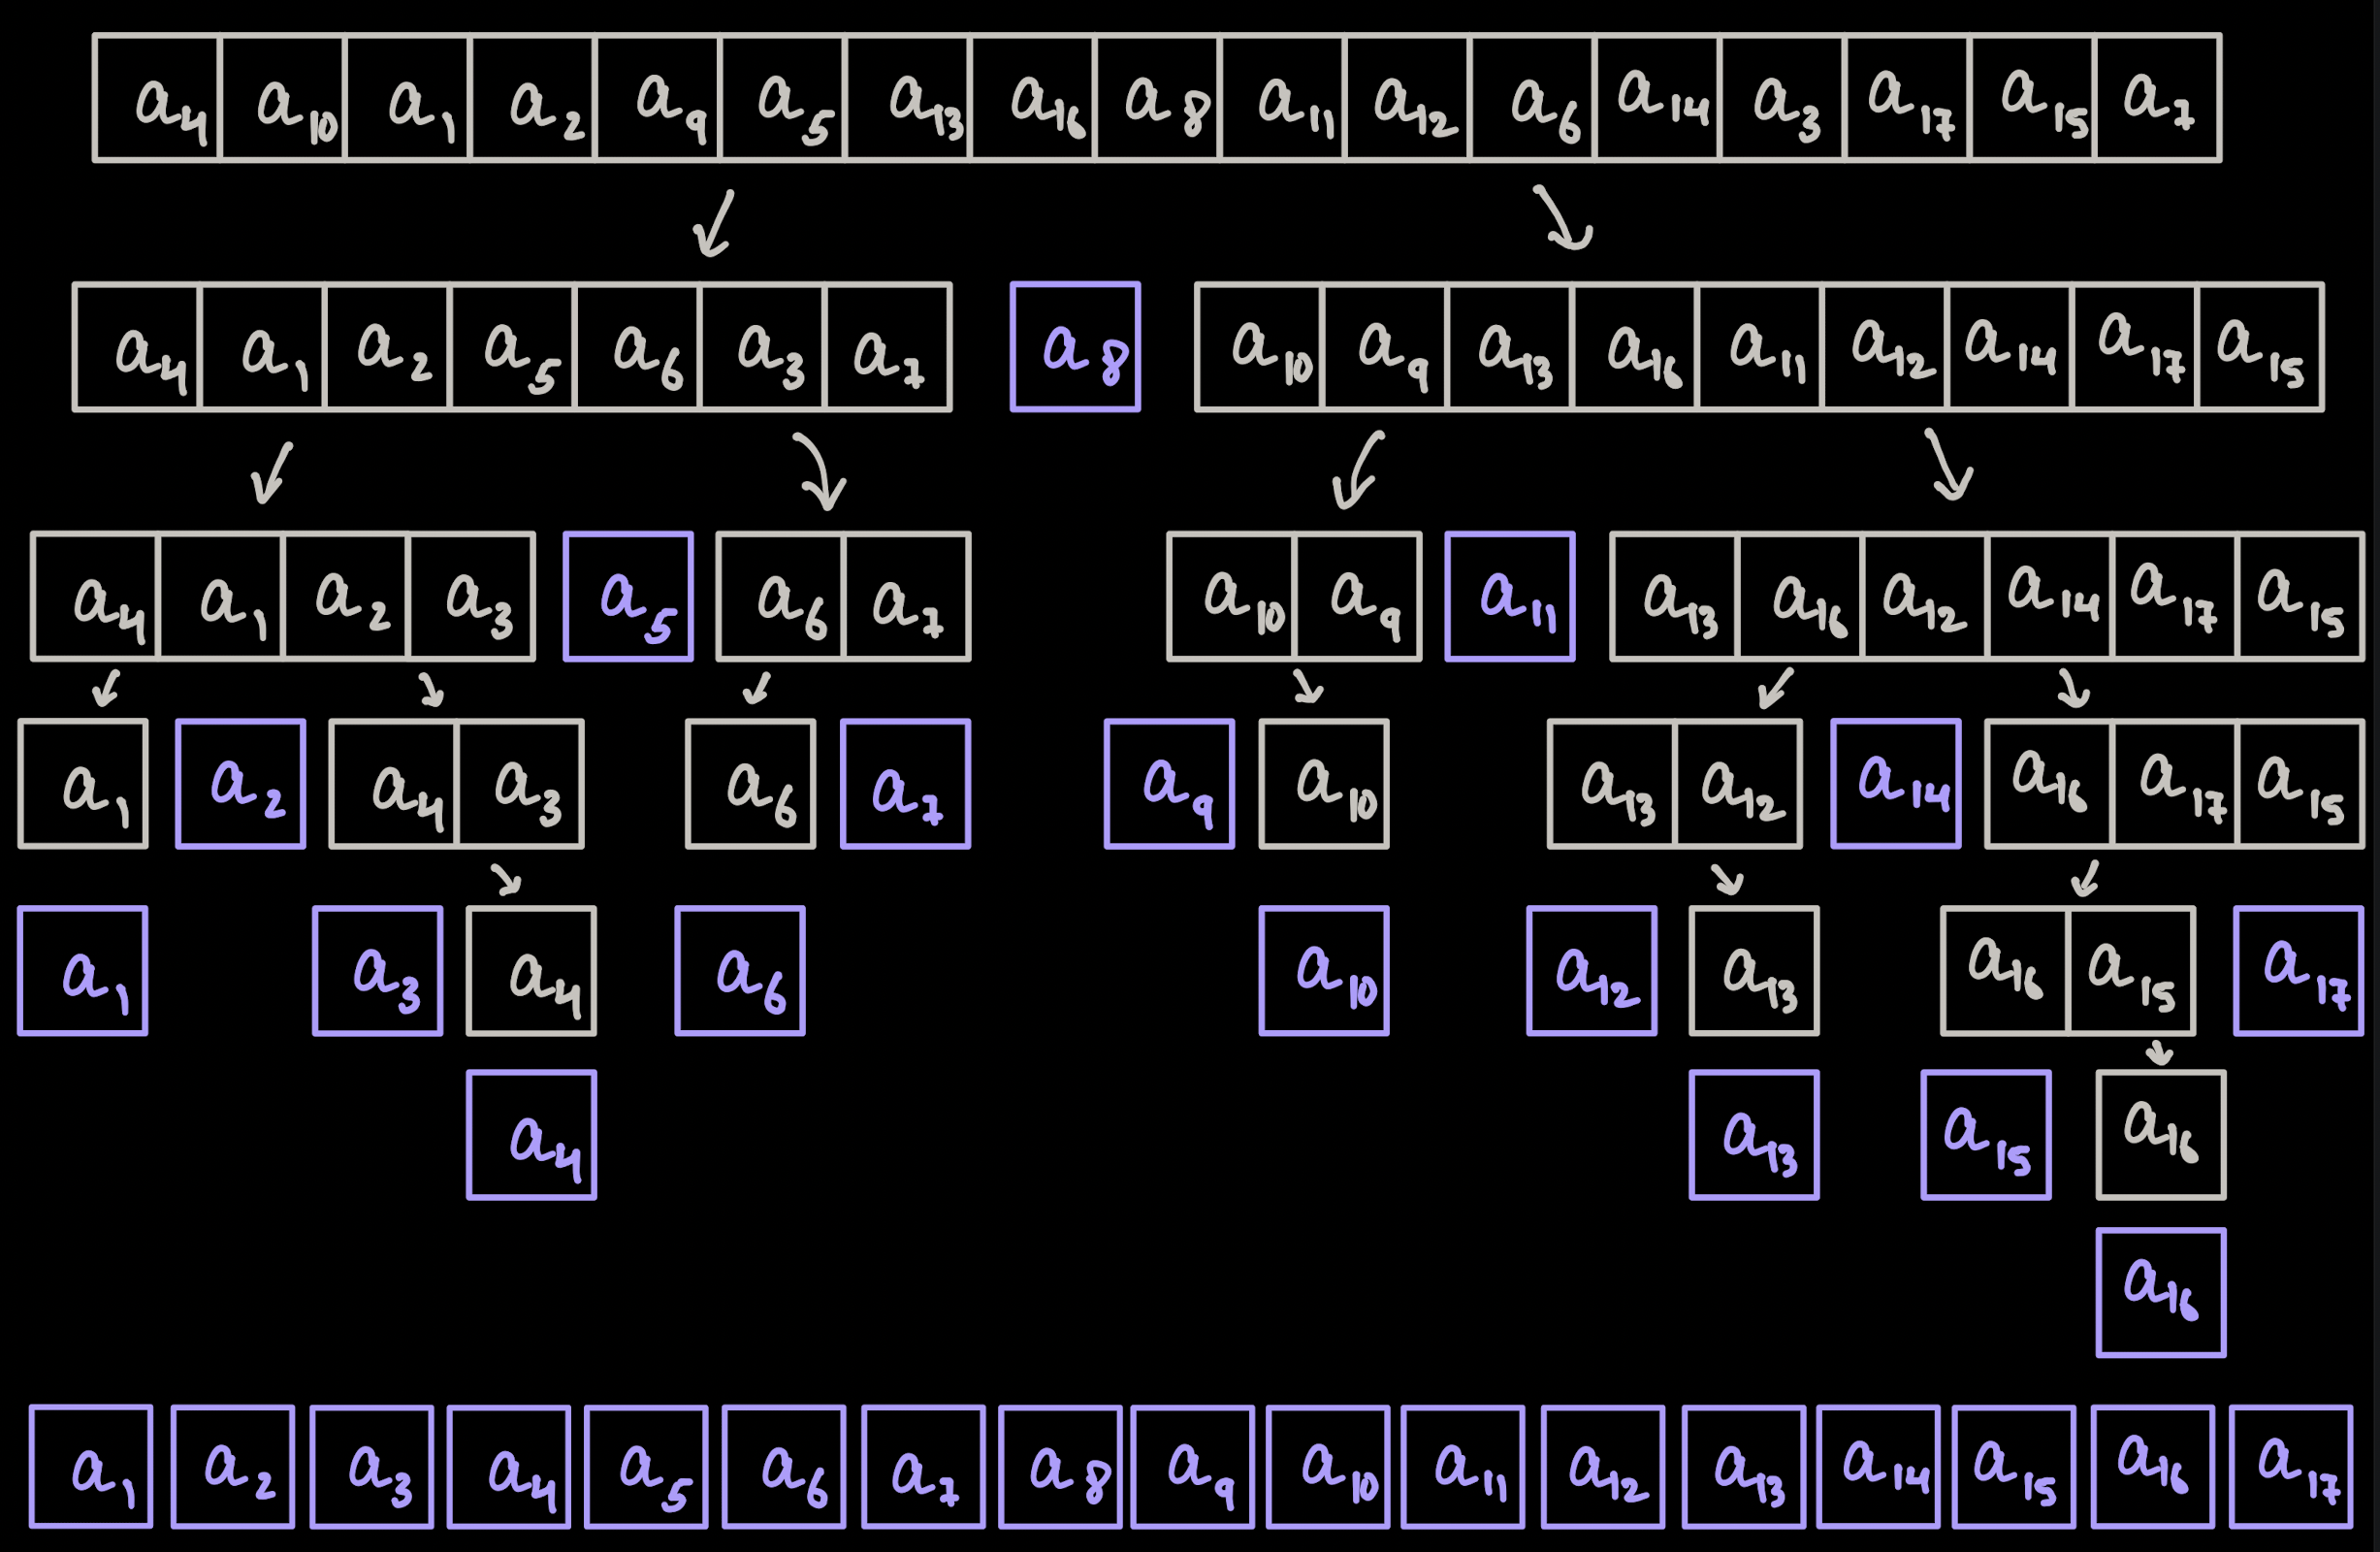

In [ ]:
from PIL import Image
im=Image.open("/content/drive/MyDrive/qs1.png")
im.show()

It's *log n*  ([why?](https://github.com/Schefflera-Arboricola/Stuff/blob/main/Assignments/Notes/kth_quick_lowerbound.pdf))
. So, then the time complexity of this sorting algorithm(i.e. Quick sort) becomes *nlogn*, on average.

The [lower bound theorem](https://youtu.be/Nz1KZXbghj8) says that we cannot go below ***O(nlogn)*** for comparison-based sorting techniques. So, we cannot go below *nlogn* using multiple *pivots*(the random breaking points on the stick). We can only reduce the constants that we ignored while calculating the complexity above. <u> *But, understanding multi-pivot cases might lead us to think about non-comparison-based sorting techniques.*</u>

<br>

---



#Diving into multi pivot quick sort

<h2>Initial thoughts</h2> 

Let's first think about breaking our stick at two points. We will get three smaller sticks. Firstly, we will have to do more work(comparisons) in each breaking-iteration(level of the tree). But, the expected lengths of the pieces will be smaller than the pieces obtained in the 1 pivot case, so the time to apply this sorting algorithm will be less for these three pieces and might balance the extra work that we have to do at each level. **So, the levels in our tree will decrease, but the amount of work on each level will increase.** So now we need to find the optimal number of pivots that minimizes the total work <sup>[2]</sup>.
 

This optimal number of pivots will probably depend on the length and type of the array. By "type" I mean "how the array was generated?". If the optimal number of pivots depends on the length of the array, then we would have to reduce the number of pivots as we go deeper into the recursion. The number of branches coming out of a node will decrease as we go down the tree <sup>[3]</sup>. 
<br>
**Pause and think**

This would be a good time to stop and run a few simulations/experiments, see how the optimal number of pivots changes for different types and lengths of arrays, use `random` module(to generate arrays using different [probability distributions](https://www.khanacademy.org/math/ap-statistics/random-variables-ap)), `time.time()` etc. , try calculating the complexities for different numbers of pivots and different arrays, try to think about the best ways for selecting pivots and just play around, test your intuitions and hypothesis, code, scribble. 

<br>

---




<h2>Trying to calculate time complexity</h2>

Before actually calculating the time complexity, let's first try running quick sort with different number of pivots on arrays of different sizes.

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np


def generate_random_list(m):
    #Returns a list of m random integers 
    rand_list = list(range(m))
    random.shuffle(rand_list)
    return rand_list

def getPivots(arr,n):
    #returns n pivots for the given list 'arr'
    m=2*n+1 #sampling
    l=random.sample(arr, m)
    l.sort()
    L=[]
    for i in range(1,m,2): L+=[l[i]]
    return L

def quick_sort_1pivot(arr):
    if len(arr) <= 20: 
        arr.sort()
        return arr
    else:
        pivot = getPivots(arr,1)[0]
        smaller = []
        greater = []
        p = []
        for x in arr:
            if x < pivot: smaller.append(x)
            elif x == pivot : p.append(x)
            else: greater.append(x)
        return quick_sort_1pivot(smaller) + p + quick_sort_1pivot(greater)

def quick_sort_2pivot(arr):
    if len(arr) <= 20: 
        arr.sort()
        return arr
    else:
        pivot1, pivot2 = getPivots(arr,2)
        smaller, between, greater = [], [], []
        p1, p2 = [], []
        for x in arr:
            if x < pivot1: smaller.append(x)
            elif x == pivot1 : p1.append(x)
            elif pivot1 < x < pivot2: between.append(x)
            elif x == pivot2 : p2.append(x)
            else: greater.append(x)
        return quick_sort_2pivot(smaller) + p1 + quick_sort_2pivot(between) + p2 + quick_sort_2pivot(greater)

def quick_sort_3pivot(arr):
    if len(arr) <= 20: 
        arr.sort()
        return arr
    else:
        pivot1, pivot2, pivot3 = getPivots(arr,3)
        smaller, between1, between2, greater = [], [], [], []
        p1, p2, p3 = [], [], []
        for x in arr:
            if x < pivot1: smaller.append(x)
            elif x == pivot1 : p1.append(x)
            elif pivot1 < x < pivot2: between1.append(x)
            elif x == pivot2 : p2.append(x)
            elif pivot2 < x < pivot3: between2.append(x)
            elif x == pivot3 : p3.append(x)
            else: greater.append(x)
        return quick_sort_3pivot(smaller) + p1 + quick_sort_3pivot(between1) + p2 + quick_sort_3pivot(between2) + p3 + quick_sort_3pivot(greater)

def quick_sort_4pivot(arr):
    if len(arr) <= 20: 
        arr.sort()
        return arr
    else:
        pivot1, pivot2, pivot3, pivot4 = getPivots(arr,4)
        smaller, between1, between2, between3, greater = [], [], [], [], []
        p1, p2, p3, p4 = [], [], [], []
        for x in arr:
            if x < pivot1: smaller.append(x)
            elif x == pivot1 : p1.append(x)
            elif pivot1 < x < pivot2: between1.append(x)
            elif x == pivot2 : p2.append(x)
            elif pivot2 < x < pivot3: between2.append(x)
            elif x == pivot3 : p3.append(x)
            elif pivot3 < x < pivot4: between3.append(x)
            elif x == pivot4 : p4.append(x)
            else: greater.append(x)
        return quick_sort_4pivot(smaller) + p1 + quick_sort_4pivot(between1) + p2 + quick_sort_4pivot(between2) + p3 + quick_sort_4pivot(between3) + p4 + quick_sort_4pivot(greater)

def getTime(func,x):
    a=time.time()
    func(x)
    b=time.time()
    return b-a

def plot_relation(x,y,xl="x",yl="y",title="tiltle",color="blue",label="label"):
    plt.plot(x,y,color=color,label=label)
    plt.xlabel(xl)  
    plt.ylabel(yl)
    plt.title(title) 
   

3


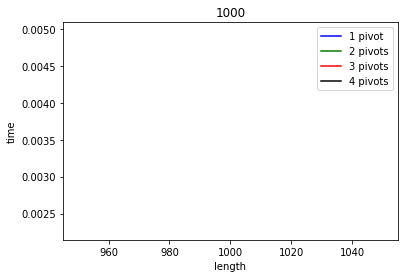

4


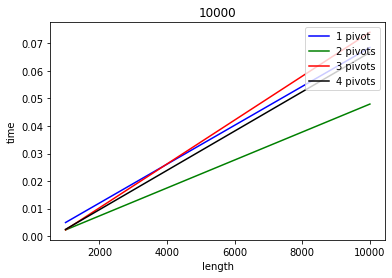

5


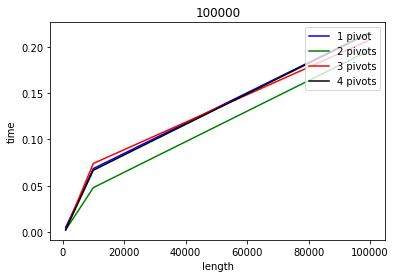

6


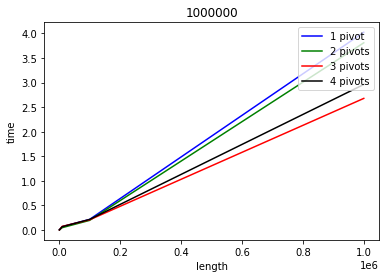

7


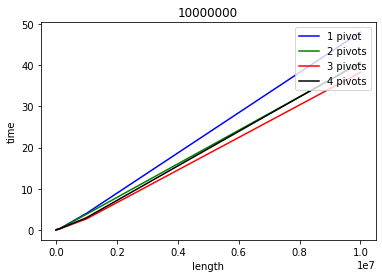

In [ ]:
T1,T2,T3,T4=[],[],[],[]
lengths=[]
for i in range(3,9):
    t1,t2,t3,t4=0,0,0,0
    for j in range(3):
        arr=generate_random_list(10**i)
        t1+=getTime(quick_sort_1pivot,arr)
        t2+=getTime(quick_sort_2pivot,arr)
        t3+=getTime(quick_sort_3pivot,arr)
        t4+=getTime(quick_sort_4pivot,arr)
    T1+=[(t1/3)]
    T2+=[(t2/3)]
    T3+=[(t3/3)]
    T4+=[(t4/3)]
    lengths+=[(10**i)]
    print(i)

    plot_relation(lengths,T1,color="blue",label="1 pivot")
    plot_relation(lengths,T2,color="green",label="2 pivots")
    plot_relation(lengths,T3,color="red",label="3 pivots")
    plot_relation(lengths,T4,color="black",label="4 pivots")

    plt.xlabel("length")
    plt.ylabel("time")
    plt.title(str(10**i))
    plt.legend(loc='upper right')
    plt.show()


<br>

---

<h2>Understanding the code </h2>  
<br>

There are 4 quicksort functions with 1,2,3 and 4 pivots. There is a function to generate a random list of a given length, with unique elements only. There is a function for giving good pivot points by sampling some elements. There are some [other ways for selecting pivots](https://iq.opengenus.org/different-pivot-in-quick-sort/) as well. Then there is a function to compute time for a given function and its argument, and a function to plot graphs.

<br>
<h4><u>Understanding Plots</u></h4> 

We have lists of lengths 10<sup>3</sup>, 10<sup>4</sup>, ... 10<sup>8</sup> and then we are taking three shuffled versions of the lists of each size, and then we are running the four quicksorts on each of them and storing the average time(for each quicksort) in lists `T1,T2,T3,T4`. So, `Ti[j]` is the average time(over 3 lists of size 10<sup>3+j</sup> ) for running `quick_sort_ipivot(arr)`. 

<br>

Then we have plotted all `Ti` with lengths. You can think that we are zooming out with each power of 10.<sup>[4]</sup>

<br>
<h4><u>Observation</u></h4> 

Although these plots are quite bad(or loose) approximations of the actual plots. So, we cannot really conclude that we should use 2-pivot quicksort for lists of size less than 10<sup>5</sup> , and 3-pivot quicksort for lists of size less than 10<sup>7</sup> and greater than 10<sup>5</sup>, because we took only 3 sample lists for each size and we are approximating the graphs with points at an exponential distance away. <sup>[5]</sup>

<br>

But, let's still try it.. here it is.




In [ ]:
def optimised_quicksort(arr):
    if len(arr)<= 20: 
        arr.sort()
        return arr
    elif len(arr)<= 10**3:
        pivot = getPivots(arr,1)[0]
        smaller = []
        greater = []
        p = []
        for x in arr:
            if x < pivot: smaller.append(x)
            elif x == pivot : p.append(x)
            else: greater.append(x)
        return optimised_quicksort(smaller) + p + optimised_quicksort(greater)
    elif len(arr)<= 10**5:
        pivot1, pivot2 = getPivots(arr,2)
        smaller, between, greater = [], [], []
        p1, p2 = [], []
        for x in arr:
            if x < pivot1: smaller.append(x)
            elif x == pivot1 : p1.append(x)
            elif pivot1 < x < pivot2: between.append(x)
            elif x == pivot2 : p2.append(x)
            else: greater.append(x)
        return optimised_quicksort(smaller) + p1 + optimised_quicksort(between) + p2 + optimised_quicksort(greater)
    else:
        pivot1, pivot2, pivot3 = getPivots(arr,3)
        smaller, between1, between2, greater = [], [], [], []
        p1, p2, p3 = [], [], []
        for x in arr:
            if x < pivot1: smaller.append(x)
            elif x == pivot1 : p1.append(x)
            elif pivot1 < x < pivot2: between1.append(x)
            elif x == pivot2 : p2.append(x)
            elif pivot2 < x < pivot3: between2.append(x)
            elif x == pivot3 : p3.append(x)
            else: greater.append(x)
        return optimised_quicksort(smaller) + p1 + optimised_quicksort(between1) + p2 + optimised_quicksort(between2) + p3 + optimised_quicksort(greater)



3


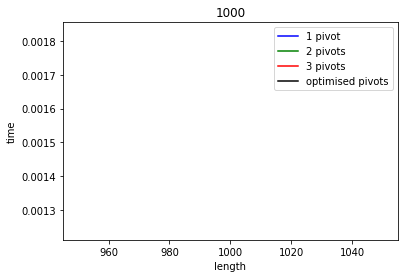

4


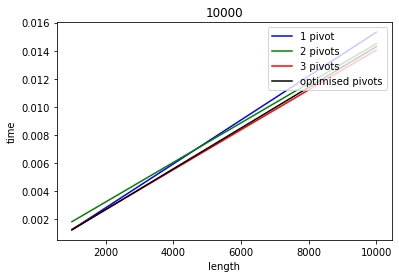

5


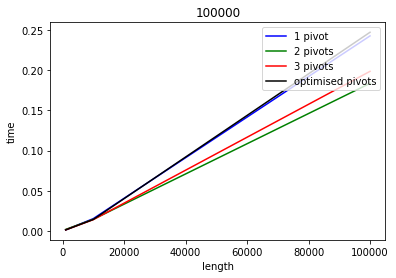

6


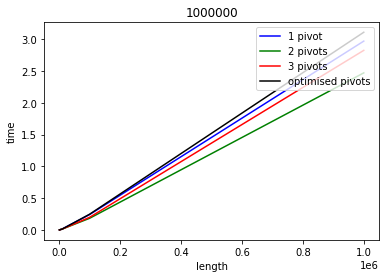

7


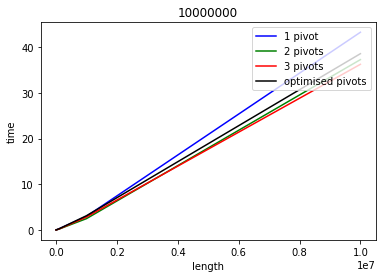

In [ ]:
T1,T2,T3,To=[],[],[],[]
lengths=[]
for i in range(3,8):
    t1,t2,t3,to=0,0,0,0
    for j in range(5):
        arr=generate_random_list(10**i)
        t1+=getTime(quick_sort_1pivot,arr)
        t2+=getTime(quick_sort_2pivot,arr)
        t3+=getTime(quick_sort_3pivot,arr)
        to+=getTime(optimised_quicksort,arr)
    T1+=[(t1/5)]
    T2+=[(t2/5)]
    T3+=[(t3/5)]
    To+=[(to/5)]
    lengths+=[(10**i)]
    print(i)

    plot_relation(lengths,T1,color="blue",label="1 pivot")
    plot_relation(lengths,T2,color="green",label="2 pivots")
    plot_relation(lengths,T3,color="red",label="3 pivots")
    plot_relation(lengths,To,color="black",label="optimised pivots")

    plt.xlabel("length")
    plt.ylabel("time")
    plt.title(str(10**i))
    plt.legend(loc='upper right')
    plt.show()



---


So, we haven't really proved anything yet. And we would need really good resources to get the accurate graphs. But, we can try calculating the number of comparisons.



<h3>Set up</h3> 

- we will be ignoring space complexity and everything else for a while, and only consider the number of comparisons
- let's also assume that `l.sort()` does `n` comparisons (`n` is the `len(l)`)
- let's also assume the pivots divide the list in almost the expected proportions.

<br>


<h3>Function</h3>

input : list size `n` and number of pivots `pnum` <br>
return : average number of comparisons

<br>


---

 

Here is a function `getPartitions(n)` that takes in the number of pivots `n` and returns the expected proportions of `n+1` partitions. You can try deriving it yourself or just accept this one. Or you can also run a simulation for up to 3 pivot cases and find the expected proportions; we won't need more than that here.

In [ ]:
def getPartitions(n):
  """ given number of pivots n, it returns the expected proportions of n+1 partitions"""
  if n==0:
    return [1,]
  else:
    x=getPartitions(n-1)
    x1=[]
    for i in x:
      j=i*(1-i/4)
      x1+=[j]
    x1+=[1-sum(x1)]
    return x1

def sum(l):
  c=0
  for i in l:
    c+=i
  return c

print(getPartitions(1))
print(getPartitions(2))
print(getPartitions(3))

[0.75, 0.25]
[0.609375, 0.234375, 0.15625]
[0.51654052734375, 0.22064208984375, 0.150146484375, 0.1126708984375]




---




<h2>Understanding the function</h2>


- if the lenght of list is less than 20, then we use `l.sort()` which takes `n` comparisons
- otherwise, 
    - first, we used `getPartitions1(pnum)` to get the list of expected proportions for given number of pivots `pnum`
    - second we used `addNoise(plst)` to add some noise to the expected proportions in the list `plst` 
    - then we extracted expected partition sizes from proportions using `[round(i*n) for i in plst]`
    - then we used `norm(plst,n)` to make the sizes add up to the actual size of the list
    - then we used `getComparisons(n-pnum,plst,pnum)` to get the number of comparisons for the current recursive level <sup>[6]</sup>
    - then in the variable `s2` we stored the number of comparisons for all the partitions made 
    - and then we returned `s1+s2` i.e number of comparisons done at the current recurssion level and the number of comparisons done for each of the partitions made on the current level.

<br>



In [ ]:
import random 
from numpy import linalg as LA


def f(n,pnum):
    if n<=20: return n
    else:
        plst=getPartitions1(pnum)
        plst=addNoise(plst)
        plst=[round(i*n) for i in plst]
        plst=norm(plst,n)
        s1=getComparisons(n-pnum,plst,pnum)
        s2=0
        for i in plst: s2+=f(i,pnum)
        return s1+s2

def getPartitions1(n):
  if n==0: return [1,]
  elif n==1: return [0.75, 0.25]
  elif n==2: return [0.61, 0.23, 0.16]
  elif n==3: return [0.52, 0.22, 0.15, 0.11]

def getComparisons(n,plst,pnum) :
    if pnum==1: return n-1
    elif pnum==2: return (plst[0]+plst[1]*2+plst[2]*2)
    elif pnum==3: return (plst[0]+plst[1]*2+plst[2]*3+plst[3]*3)

def addNoise(l):
    l1=[]
    for i in l:
        x=random.random()/100
        l1+=[abs(x+i)]
    return l1

def norm(l,n):
    s=sum(l)
    j=0
    length=len(l)
    if s>n:
        i=s-n
        while i!=0:
            l[j]-=1
            i-=1
            j=(j+1)%length
    elif s<n:
        i=n-s
        while i!=0:
            l[j]+=1
            i-=1
            j=(j+1)%length
    return l
                

10000


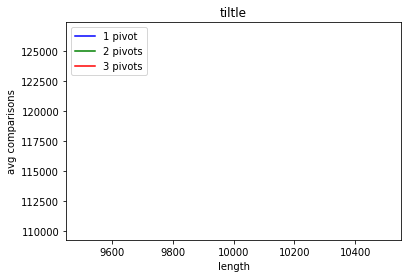

1010000


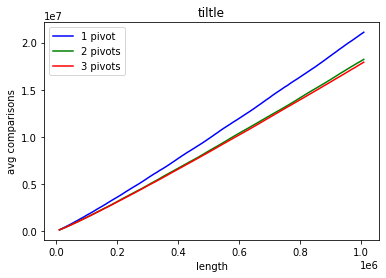

2010000


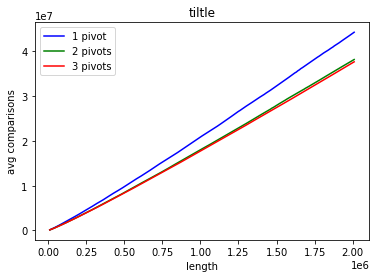

3010000


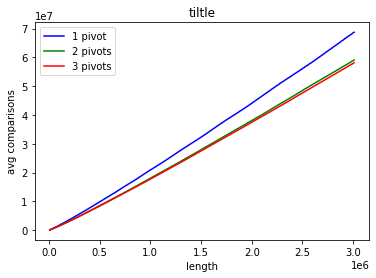

4010000


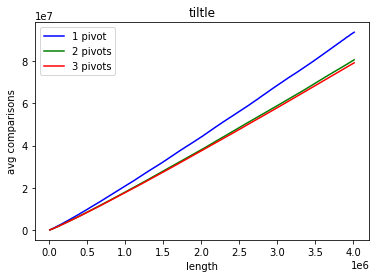

5010000


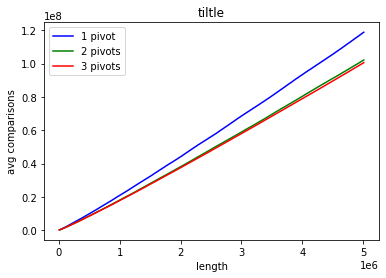

6010000


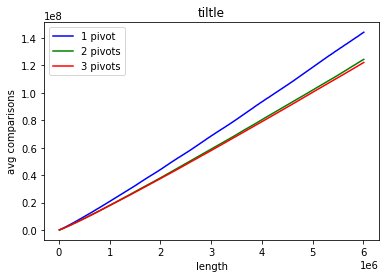

7010000


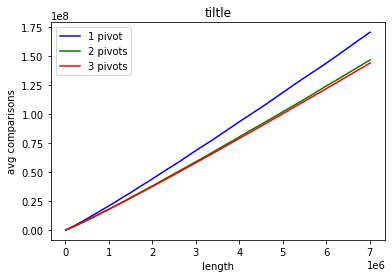

8010000


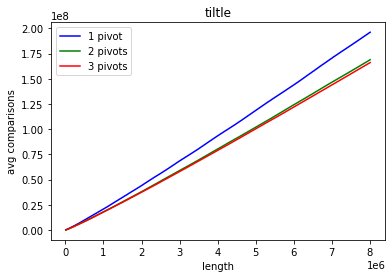

9010000


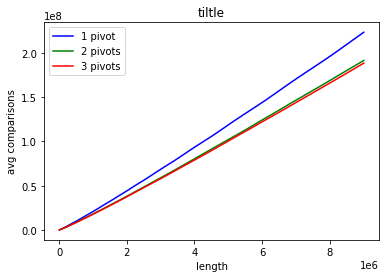

In [ ]:
T1,T2,T3,lengths=[],[],[],[]
j=0
for i in range(10**4,10**7,10**4):
    T1+=[f(i,1)]
    T2+=[f(i,2)]
    T3+=[f(i,3)]
    lengths+=[i]

    if j%100==0: 
        print(i)
        plot_relation(lengths,T1,color="blue",label="1 pivot")
        plot_relation(lengths,T2,color="green",label="2 pivots")
        plot_relation(lengths,T3,color="red",label="3 pivots")

        plt.xlabel("length")
        plt.ylabel("avg comparisons")
        plt.legend(loc='upper left')
        plt.show()
    j+=1


<h2>Conclusion</h2>

We can see that the number of comparisons are least for 3-pivot quicksort, but we know that's not true always because there are a lot of other things that determine the time, like how the lists are stored in the memory and how they are accessed and the cache misses, etc. 

<br>

In this paper, [Dual-Pivot Quicksort algorithm by Vladimir Yaroslavskiy](https://huan.io/ref/dual-pivot-quicksort.pdf), the quicksort is implemented in JAVA, and there are no new lists made in each recursion; instead, there is swapping of elements. So, it will take up less memory too. And the analysis is done based on the number of comparisons and swaps. The detailed time complexity calculations for this algorithm are done here - [Average Case Analysis of Java 7’s Dual Pivot Quicksort](https://arxiv.org/pdf/1310.7409.pdf). In this paper - [Multi-Pivot Quicksort](https://epubs.siam.org/doi/epdf/10.1137/1.9781611973198.6), the analysis for 1,2 and 3 pivot quicksort is done based on the number of comparisons, swaps, cache misses and  number of recursive calls to a subproblem greater in size than a block in cache. <sup>[7]</sup>


<br>

---



---


<br>

#Side-notes



<b><i>[1]</i></b> : "kind of sorted" means if we can capture the "sorted-ness" or "unsorted-ness" of an array in some ways(like [here](https://arxiv.org/pdf/0906.2893.pdf) the stability of an SSN is captured by defining "energy"), then this new array will have more "sorted-ness" value than the initial array.

<br>

<b><i>[2]</i></b> : Also, we would have to do some work in sorting the pivots, but we will assume that time(to sort the pivots) is negligible as compared to the sorting time of the array.

<br>

<b><i>[3]</i></b> : And for really small arrays we shouldn't be using quick sort, instead, we can use [tim sort](https://www.geeksforgeeks.org/timsort/)(mix of insertion sort and merge() of merge sort).

<br>

<b><i>[4]</i></b> : You cannot see the 10<sup>8</sup> graph because colab couldn't handle that many lists. 

<br>


<b><i>[5]</i></b> : Here, we plotted a length vs. time graph for different pivots, but instead, we can make a different axis for the number of pivots too and get a 3D surface, such that for a `(length,pivot)` pair, we will have a `time` value. We can apply something like [gradient descent](https://youtu.be/giZD8yzXEZ4) on this surface to get the optimal number of pivots, but for that our function needs to be continuous, which it isn't(since number of pivots and lengths are discrete), but we can find a continuous approximation for it. 

<br>



<b><i>[6]</i></b> : `getComparisons(n-pnum,plst,pnum)`

1 pivot : <br>
    - 1 comparison for all elements<br>

2 pivots : <br>
    - partition 1 elements - comparison with 1 pivot<br>
    - partition 2 elements - comparisons with 2 pivots<br>
    - partition 3 elements - comparisons with 2 pivots<br>

3 pivots : <br>
    - partition 1 elements - comparisons with 1 pivot<br>
    - partition 2 elements - comparisons with 2 pivots<br>
    - partition 3 elements - comparisons with 3 pivots<br>
    - partition 4 elements - comparisons with 3 pivots<br>
    
<br>

<b><i>[7]</i></b> : Further exploration

- *Similarities between multi-pivot quicksort and [hashing](https://youtu.be/0M_kIqhwbFo)*<br>
Hashing is basically when we structure our data into smaller chunks and there is a key for each chunk(like [“balls and bins”](https://github.com/Schefflera-Arboricola/Stuff/blob/main/Projects%20and%20Simulation/Holi_Simulation.ipynb)). In hashing, a very common way to bin the elements is to use the modulus function. And in multi-pivot quicksort, we can think that we are putting the elements into the bins(partitions) made by pivots.


- *Relation to the [cake-candle experiment](https://youtu.be/FkVe8qrT0LA)*<br>
We can think of the 2 candles as the 2 pivots, and the knife falling between them as any element falling between the 2 pivots.

<br>

---

<br>